Index(['Id', 'Family', 'Attn_Implementation',
       'Concept Relative Projection (Guided - Unguided)',
       'Parameter Count (1E9)', 'Guide'],
      dtype='object')


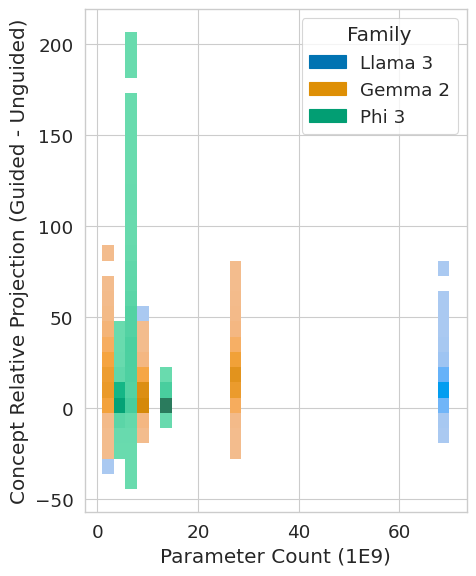

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/08_guided_generation_model_comparison.pkl")
df.columns = [s.title() for s in df.columns]

plt.figure(figsize=(5, 6))

print(df.columns)

sns.histplot(
    df,
    y=df.columns[3], 
    hue=df.columns[1],
    x=df.columns[4],
    # weights=df.columns[4],
    palette="colorblind",
    bins=30,
)

plt.tight_layout()
plt.savefig("resources/08_guided_generation_model_comparison_param_count.pdf", dpi=200, bbox_inches="tight")

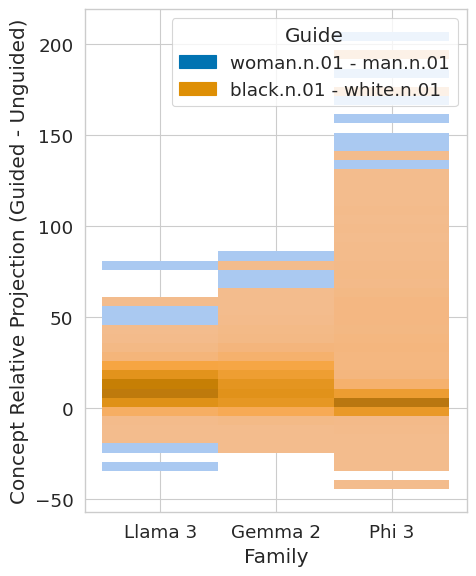

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/08_guided_generation_model_comparison.pkl")
df.columns = [s.title() for s in df.columns]

plt.figure(figsize=(5, 6))

sns.histplot(
    df,
    y=df.columns[3], 
    x=df.columns[1],
    hue=df.columns[5],
    # weights=df.columns[4],
    palette="colorblind",
    bins=50,
)

plt.tight_layout()
# plt.legend(alignment="left")
plt.savefig("resources/08_guided_generation_model_comparison_guide.pdf", dpi=200, bbox_inches="tight")

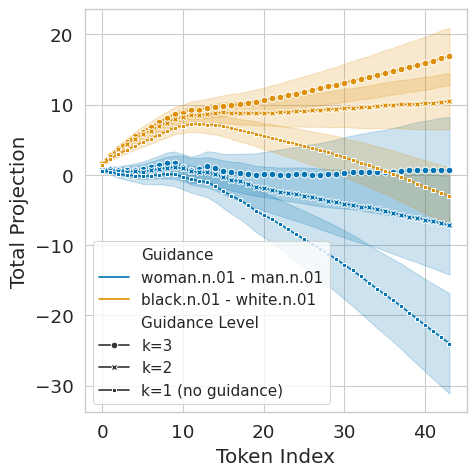

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/06_guided_generation_top_k_ablation.pkl")
df.columns = [s.title() for s in df.columns]

HUE = "Model Family"
# df[HUE] = df["Model"].str.extract(r"^([^\s]+\s+[^\s]+)")

plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=df.columns[0],
    y=df.columns[1],
    hue=df.columns[3],
    style=df.columns[2],
    markers=True,
    dashes=False,
    errorbar=("sd", 0.2),
    palette="colorblind",
)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("resources/06_guided_generation_top_k_ablation.pdf", dpi=400, bbox_inches="tight")

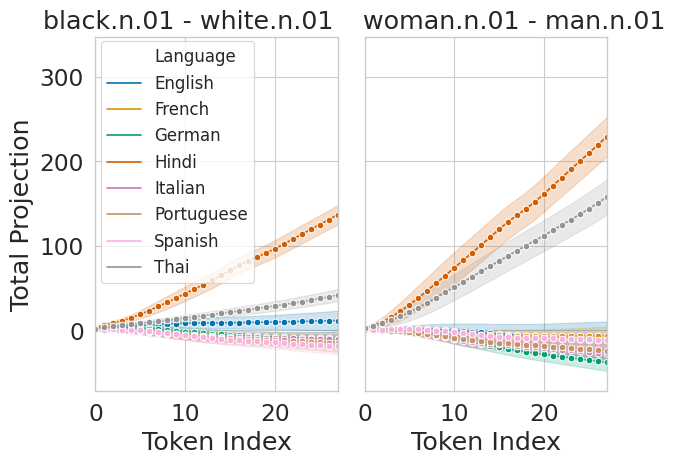

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.9)

df = pd.concat([
    pd.read_pickle("resources/07_guided_generation_language_ablation_black_white.pkl").assign(concept="black.n.01 - white.n.01"),
    pd.read_pickle("resources/07_guided_generation_language_ablation_woman_man.pkl").assign(concept="woman.n.01 - man.n.01")
])
df.columns = [s.title() for s in df.columns]

x = df.columns[0]
y = df.columns[1]
hue = df.columns[2]
style = df.columns[3]
concept_col = 'Concept'

# Create a figure with two subplots side by side, but with adjusted aspect ratio
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

# Get unique concepts
concepts = df[concept_col].unique()

# Plot each concept in its own subplot
space = "       "
for i, concept in enumerate(concepts):
    concept_data = df[df[concept_col] == concept]
    
    sns.lineplot(
        data=concept_data,
        x=x,
        y=y,
        hue=hue,
        style=style,
        markers=True,
        dashes=False,
        errorbar=("sd", 1),
        palette="colorblind",
        ax=axes[i]
    )
    
    axes[i].set_xlim(0, concept_data.groupby(hue)[x].max().min())
    axes[i].set_title(concept + space if i == 0 else space + concept)
    
    # Only keep ylabel for the first subplot
    if i > 0:
        axes[i].set_ylabel('')
    
    # Remove legend from all subplots (we'll create a common one)
    axes[i].get_legend().remove()

# Create a legend to the right of the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:-2], labels[:-2], loc='center right', bbox_to_anchor=(0.35, 0.64), fontsize=12)

plt.tight_layout()
plt.subplots_adjust(right=0.78)  # Make room for the legend on the right
plt.savefig("resources/07_guided_generation_language_ablation_subplots.pdf", dpi=400, bbox_inches="tight")

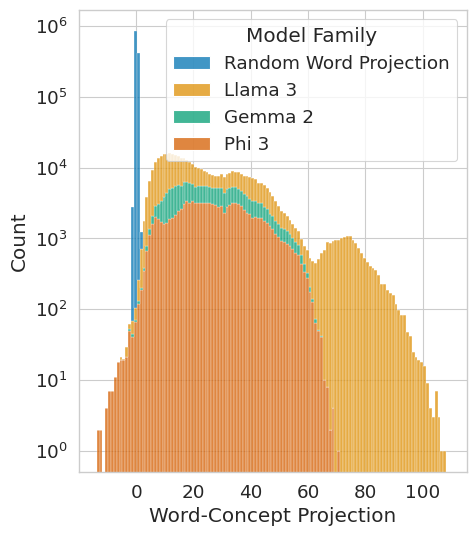

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

df = pd.read_pickle("resources/03_concept_vs_word_frames_relationship.pkl")
df = df.rename(columns={"total projection": "Word-Concept Projection"})
df.columns = [s.title() for s in df.columns]

plt.figure(figsize=(5, 6))
plt.yscale("log")
sns.histplot(
        df, 
        x=df.columns[0], 
        hue=df.columns[1], 
        palette="colorblind", 
        multiple="stack", 
        discrete=True,
)
# plt.legend(fontsize=11)
# plt.tight_layout()
plt.savefig("resources/03_concept_vs_word_frames_relationship.pdf", dpi=200, bbox_inches="tight")